In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [3]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
X=data[['CO','NOX']] #variable independiente
y=data['PM10'] #variable dependiente

In [45]:
split_index=int(len(data)*0.8)

In [46]:
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [8]:
pip install LinearRegression

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model=LinearRegression()

In [49]:
model.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred=model.predict(X_test)

In [51]:
coeficientes=pd.DataFrame({
    'Variable':X.columns,
    'Coeficientes':model.coef_
    
})

In [52]:
print(coeficientes)

  Variable  Coeficientes
0       CO      -4.42238
1      NOX       0.74793


In [53]:
print(f"Intercepto:{model.intercept_}")

Intercepto:15.394050316557067


In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2=r2_score(y_test,y_pred)

In [57]:
r2

0.4051483156923722

In [58]:
rmse=mean_squared_error(y_test,y_pred,squared=False)

In [59]:
rmse

11.015555045398493

In [60]:
mae=mean_absolute_error(y_test,y_pred)

In [61]:
mae

8.77187127970108

In [62]:
y_pred

array([35.84322788, 35.16986591, 27.93741429, 36.63817377, 41.13384142,
       41.06242395, 42.75638277, 44.17721444, 41.37719193, 25.82155189,
       29.04508134, 29.73548446, 32.63938451, 33.26152794, 37.54453601,
       31.04669963, 32.62612718, 42.79223458, 44.49395668, 46.49808759,
       44.54137796, 39.69857864, 29.54418195, 25.75107461, 40.48770376,
       43.21548707, 40.28825791, 30.60020619, 33.59204026, 36.88470139,
       31.9400362 , 51.05169762, 46.68372588, 40.86591425, 49.42332902,
       46.26082727, 47.17695499, 39.32150203, 41.74288829, 41.65078904,
       54.44211195, 48.85309131, 43.87679743, 44.1830246 , 33.8194889 ,
       42.91702292, 44.68183935, 50.51921234, 46.307285  , 41.39198454,
       32.1379949 , 31.89452241, 35.88945277, 54.38695419, 53.14398519,
       50.37495549, 33.42907716, 37.13424237, 35.02935838, 33.6375235 ,
       34.46112397, 47.26249987, 48.58843081, 35.47889646, 49.67038674,
       39.44255202, 39.29978144, 53.18432663, 51.63623227, 49.73

In [33]:
import matplotlib.pyplot as plt

In [63]:
residuos=y_test-y_pred

Text(0, 0.5, 'Frecuencia')

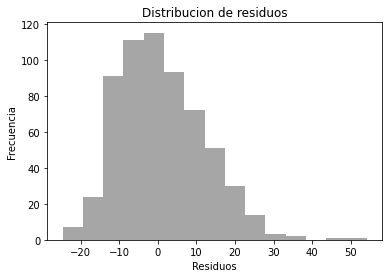

In [64]:
plt.hist(residuos,bins=15,color='gray',alpha=0.7)
plt.title('Distribucion de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

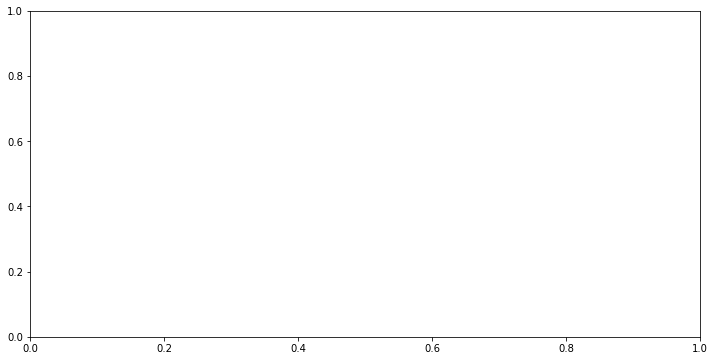

In [65]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'].to_numpy(),y_test,linestyle='--',color='green')
plt.plot(data.iloc[split_index:]['fecha'].to_numpy(),y_pred,linestyle='-',color='red')

### Problemas con la grafica

In [ ]:
###### Usar 'CO','NOX', 'PM25' y 'SO2' para predecir los 'PM10'

In [66]:
X=data[['PM25','SO2']] #variable independiente
y=data['PM10'] #variable dependiente

In [67]:
split_index=int(len(data)*0.8)

In [68]:
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [69]:
model.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred=model.predict(X_test)

In [71]:
coeficientes=pd.DataFrame({
    'Variable':X.columns,
    'Coeficientes':model.coef_
    
})

In [72]:
print(coeficientes)

  Variable  Coeficientes
0     PM25      1.482419
1      SO2      0.380519


In [73]:
print(f"Intercepto:{model.intercept_}")

Intercepto:8.239487895849031


In [74]:
r2=r2_score(y_test,y_pred)

In [75]:
r2

0.6366773565846755

In [76]:
rmse=mean_squared_error(y_test,y_pred,squared=False)

In [77]:
rmse

8.608912027075915

In [78]:
mae=mean_absolute_error(y_test,y_pred)

In [79]:
mae

6.740677985309806

In [80]:
y_pred

array([30.6098527 , 38.54170391, 37.01149031, 24.62779181, 31.0253409 ,
       41.17991579, 37.90052852, 26.22302868, 36.41573568, 26.5533258 ,
       20.70349723, 18.66781739, 24.49322383, 31.96351721, 29.15520217,
       39.11185232, 21.26796798, 32.63029739, 28.36943053, 28.72184318,
       36.06669665, 33.2050398 , 25.0496912 , 16.9842077 , 27.94203546,
       31.56539932, 49.74208608, 24.71134369, 21.64247763, 40.52973622,
       24.33058674, 28.06034427, 27.33695338, 24.08301878, 41.4933282 ,
       52.40219761, 43.57708671, 38.27829831, 38.71778287, 31.71950656,
       37.45999559, 42.71028103, 39.35432117, 34.0830695 , 31.30427202,
       37.90224886, 49.87495893, 47.41772639, 37.13937432, 30.24615917,
       31.91176848, 31.36576549, 29.72150366, 34.26029478, 38.08964294,
       37.81402366, 25.86265138, 30.58560427, 35.83465644, 33.62807102,
       26.04522675, 33.94439497, 47.75167553, 38.03893508, 48.61601727,
       51.35255696, 48.48210434, 40.89231702, 33.47681536, 27.50

In [81]:
residuos=y_test-y_pred

Text(0, 0.5, 'Frecuencia')

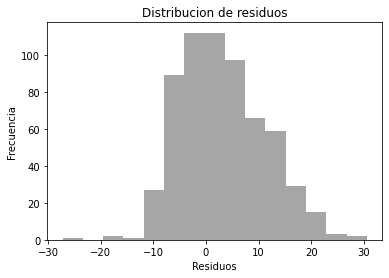

In [82]:
plt.hist(residuos,bins=15,color='gray',alpha=0.7)
plt.title('Distribucion de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

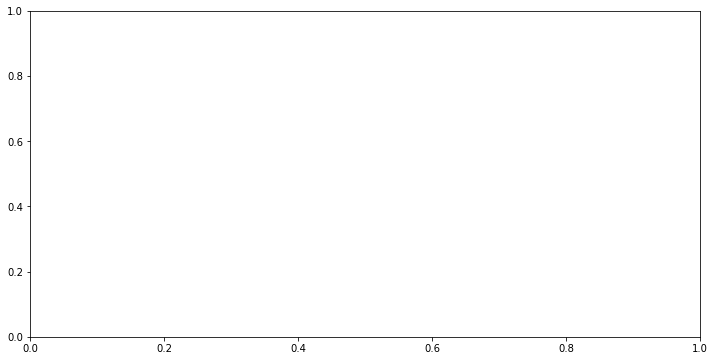

In [83]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'].to_numpy(),y_test,linestyle='--',color='green')
plt.plot(data.iloc[split_index:]['fecha'].to_numpy(),y_pred,linestyle='-',color='red')

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [95]:
data=data.sort_values(by='fecha')
split_index=int(len(data)*0.8)
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [96]:
rf_model=RandomForestRegressor(n_estimators=100,max_depth=10,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [97]:
y_pred=rf_model.predict(X_test)

In [98]:
y_pred

array([31.97963877, 39.5639307 , 36.32001584, 21.51892564, 27.36281563,
       42.09270704, 33.42980829, 22.87690203, 32.79089097, 24.83200107,
       18.60833931, 18.08642934, 19.83871578, 30.37145707, 27.32069635,
       40.46775559, 22.32256376, 31.17674335, 27.58622168, 26.66845588,
       35.9793763 , 31.97765891, 29.37520335, 17.04740271, 25.50281515,
       30.61498692, 54.92907147, 29.33078923, 21.7472904 , 41.27752477,
       27.98804409, 28.88240488, 27.50017765, 22.00148349, 43.90081716,
       61.0663236 , 43.08047925, 38.45854528, 41.01196857, 30.73605861,
       37.67328507, 40.96081294, 38.22221187, 34.98717665, 27.60097546,
       38.82015277, 53.3819991 , 50.4781275 , 39.19500217, 26.5637869 ,
       32.94297181, 29.419494  , 28.24947739, 35.07921407, 38.71375014,
       36.89693439, 26.52231907, 31.73816267, 31.88197589, 36.66928652,
       26.04896585, 31.43322304, 49.68443117, 38.963672  , 56.05146003,
       50.71623358, 53.28342229, 44.5319849 , 33.27267482, 26.88

In [90]:
coeficientes=pd.DataFrame({
    'Variable':X.columns,
    'Coeficientes':model.coef_
    
})

In [91]:
print(coeficientes)

  Variable  Coeficientes
0     PM25      1.482419
1      SO2      0.380519


In [92]:
print(f"Intercepto:{model.intercept_}")

Intercepto:8.239487895849031


In [99]:
r2=r2_score(y_test,y_pred)

In [100]:
r2

0.6377743643479709

In [101]:
rmse=mean_squared_error(y_test,y_pred,squared=False)

In [102]:
rmse

8.59590542941244

In [103]:
mae=mean_absolute_error(y_test,y_pred)

In [104]:
mae

6.639977224812238

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

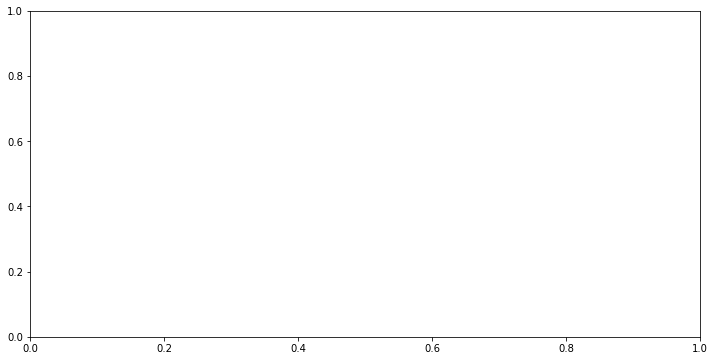

In [105]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'].to_numpy(),y_test,linestyle='--',color='green')
plt.plot(data.iloc[split_index:]['fecha'].to_numpy(),y_pred,linestyle='-',color='red')

### Revisar por que no me compila